In [138]:
"""
Import librarys
"""
import numpy as np 
import matplotlib.pyplot as plt
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt



<h2>Genera x y y </h2>

In [161]:
n = 30
# x_train = np.random.rand(n) * 10 
# y_train = np.random.rand(n) * 1000

# np.random.seed(0)
# x_train = 2 * np.random.rand(n, 1)
# y_train = 4 + 3 * x_train + np.random.randn(n, 1)
# x_train = np.array([1.0, 2.0, 3.0,4.0, 5.0, 6.0])
# y_train = np.array([300, 500, 600,660, 800, 900])

n = 20
np.random.seed(0)
x_train = 4 * np.random.rand(n, 1)
y_train = 500 * x_train + np.random.randn(n, 1)
x_train = x_train.flatten()
y_train = y_train.flatten()

print(f"x_train={x_train}")
print(f"y_train={y_train}")

x_train=[2.19525402 2.86075747 2.4110535  2.17953273 1.6946192  2.58357645
 1.75034885 3.567092   3.85465104 1.53376608 3.16690015 2.11557968
 2.27217824 3.70238655 0.28414423 0.3485172  0.08087359 3.33047938
 3.112627   3.48004859]
y_train=[1099.12108693 1430.17357448 1205.83981984 1088.91227025  844.75660886
 1292.44184473  876.03885872 1782.80383654 1929.59527563  765.42867198
 1583.49583468 1057.60265566 1137.6219014  1852.66263536  142.22706382
  174.63676192   39.54900913 1663.25889463 1555.96558975 1740.18064546]


In [147]:
x_train = np.array([1.0, 2.0, 3.0])
y_train = np.array([300, 500, 600])
print(f"x_train={x_train}")
print(f"y_train={y_train}")

x_train=[1. 2. 3.]
y_train=[300 500 600]


<h2>Model Implementation</h2>

In [148]:

def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

<h2>MSE</h2>

In [142]:
def MSE(y, y_):
    m = y.shape[0]
    mse = 0
    for i in range(m):
        mse += (y[i] - y_[i]) ** 2
    return round(mse / m, 2)


<h2>Derivada parcial w, b</h2>

In [143]:
# def derivada_parcial_w(y_, y, x):
#     d_ = 0
#     m = y.shape[0]
#     for i in range(m):
#         d_ += (y_[i] - y[i]) * x[i]
#     return d_ / m

# def derivada_parcial_b(y_, y):
#     d_ = 0
#     m = y.shape[0]
#     for i in range(m):
#         d_ += (y_[i] - y[i]) 
#     return d_ / m

def derivada_parcial_b_w(w, b , y, x):
    d_w = 0
    d_b = 0
    m = y.shape[0]
    
    for i in range(m):
        f_wb = w * x[i] + b - y[i]
        d_w += f_wb * x[i]
        d_b += f_wb
        
    d_w = d_w / m
    d_b = d_b / m
    return round(d_w,2), round(d_b,2)



<h2>Gradiante descendente</h2>

In [144]:
def generate_gradiente(w, b , alpha , d_w , d_b):
    w = w - alpha * d_w
    b = b - alpha * d_b
    return w, b

<h2>generate Imagen</h2>

In [167]:
def graficaExperimente(x_train, y_train, tmp_f_wb , w, b , imagen ,epoch):
    plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
    plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
    plt.title(f"Example {imagen} Housing prices w={w} , b = {b} epoch = {epoch}")
    plt.ylabel('x - price')
    plt.xlabel('y - size')
    plt.legend()
    plt.savefig(f"Prediccion_{imagen}_{w}_{b}.png" )
    plt.show()

def graficaGradiente(loss, w , b):
    plt.plot(loss, c='b',label='Loss')
    plt.title(f"Gradiente descendente w={w} , b = {b} ")
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.savefig(f"Gradiente_{w}_{b}.png" )
    plt.show()


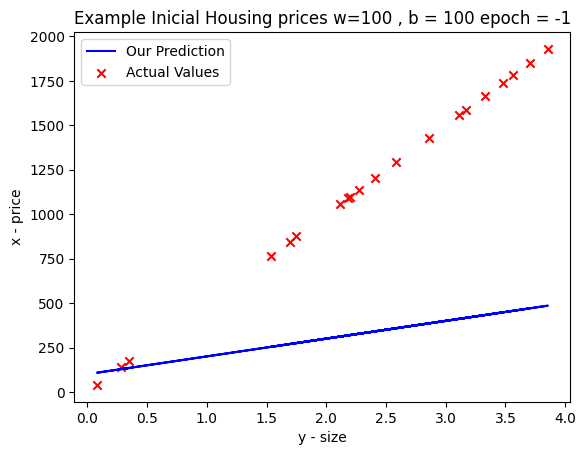

 Learning rate 0 ,  loss = 884839.75, w = 100, b = 100
 Learning rate 1 ,  loss = 64611.49, w = 341.942, b = 183.049
 Learning rate 2 ,  loss = 11699.59, w = 404.173, b = 201.512
 Learning rate 3 ,  loss = 8058.21, w = 420.854, b = 203.653
 Learning rate 4 ,  loss = 7588.0, w = 425.978, b = 201.69899999999998
 Learning rate 5 ,  loss = 7329.04, w = 428.16, b = 198.749
 Learning rate 6 ,  loss = 7091.01, w = 429.58200000000005, b = 195.58599999999998
 Learning rate 7 ,  loss = 6861.52, w = 430.797, b = 192.409
 Learning rate 8 ,  loss = 6639.53, w = 431.94500000000005, b = 189.267
 Learning rate 9 ,  loss = 6424.71, w = 433.06300000000005, b = 186.172
 Learning rate 10 ,  loss = 6216.81, w = 434.16, b = 183.126
 Learning rate 11 ,  loss = 6015.68, w = 435.238, b = 180.13
 Learning rate 12 ,  loss = 5821.06, w = 436.299, b = 177.183
 Learning rate 13 ,  loss = 5632.74, w = 437.342, b = 174.284
 Learning rate 14 ,  loss = 5450.5, w = 438.368, b = 171.432
 Learning rate 15 ,  loss = 5274.1

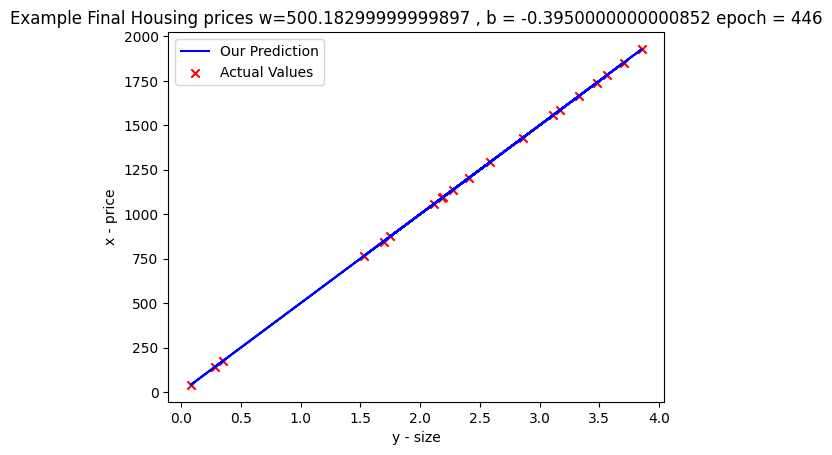

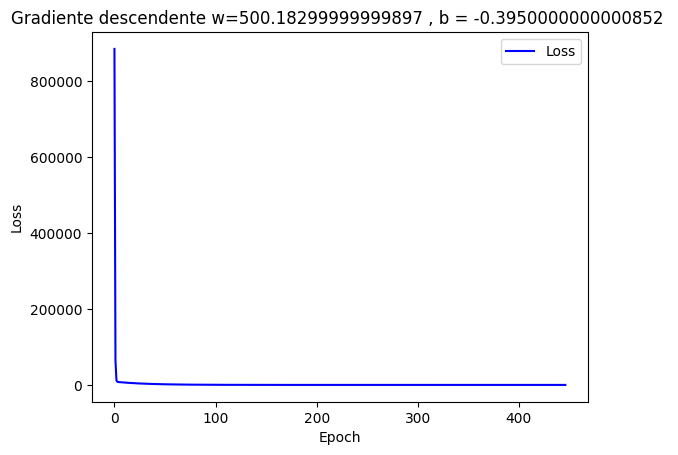

In [168]:
w =100 
b =100 
alpha = 0.1
mse_valores = []
cont = 0
y_predict = compute_model_output(x_train, w, b)
graficaExperimente(x_train, y_train, y_predict , w, b , "Inicial" , -1)
loss_almacen = []
i = 0
while True:
# while True:
    loss = MSE(y_train, y_predict)
    loss_almacen.append(round(loss,4))
    # graficaExperimente(x_train, y_train, tmp_f_wb , w, b , i)
    print(f" Learning rate {i} ,  loss = {loss}, w = {w}, b = {b}")
    d_w ,d_b = derivada_parcial_b_w(w, b, y_train, x_train)
    w_temp,b_temp =generate_gradiente(w, b,  alpha , d_w , d_b)
    if w_temp - w <= 0.0000001:
        break
    w = w_temp
    b = b_temp
    y_predict = compute_model_output(x_train, w, b)
    i += 1

graficaExperimente(x_train, y_train, y_predict , w, b , "Final" , i)
graficaGradiente(loss_almacen , w, b )

